<a href="https://colab.research.google.com/github/devcon14/colab-connect/blob/main/backtests/Backtest_NR7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Research, not nr7:

https://thetradingmuse.com/backtesting-stochastic-oscillator-sma-and-wma-trading-strategy-with-bitcoin/



In [49]:
# !pip install quandl
if True:
  !rm -rf colab-connect
  !git clone https://github.com/devcon14/colab-connect.git
  import sys
  if not "colab-connect" in sys.path:
    sys.path.append("colab-connect")

ALPHAVANTAGE_API = "C8RFYYD13O6DPWQ2"
API_GLASSNODE = "b07abeb0-382a-42df-aeed-e72a989f240d"
CC_API_KEY = "4c62b8fbe3270e36eec8a2db57e10460da6b1223b198417f9bc17d1989836751"
QUANDL_API = "Nn-WLPogByiCBZmCJQS6"

Cloning into 'colab-connect'...
remote: Enumerating objects: 156, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 152
Receiving objects: 100% (156/156), 521.89 KiB | 2.13 MiB/s, done.
Resolving deltas: 100% (81/81), done.


In [50]:
import pandas_datareader.data as web
import pandas as pd

symbol = "SPY"

if "/" in symbol:
  sec = web.DataReader(symbol, "av-forex-daily", api_key=ALPHAVANTAGE_API)
else:
  # sec = web.DataReader(symbol, "av-daily-adjusted", api_key=ALPHAVANTAGE_API)
  sec = web.DataReader(symbol, "av-daily-adjusted", api_key=ALPHAVANTAGE_API, start="2010-01-01")
  # sec["close"] = sec["adjusted close"]

sec["symbol"] = symbol
sec

open      high     low   close  adjusted close     volume  \
2010-01-04  112.37  113.3900  111.51  113.33       88.390196  118857369   
2010-01-05  113.26  113.6800  112.85  113.63       88.624176  111519230   
2010-01-06  113.52  113.9900  113.43  113.71       88.686571  116017127   
2010-01-07  113.50  114.3300  113.18  114.19       89.060941  130502017   
2010-01-08  113.89  114.6200  113.66  114.57       89.357317  126357911   
...            ...       ...     ...     ...             ...        ...   
2022-12-19  383.47  383.8200  378.28  380.02      380.020000   79878103   
2022-12-20  379.23  382.2300  377.85  380.54      380.540000   74427240   
2022-12-21  383.25  387.4100  382.69  386.23      386.230000   78167369   
2022-12-22  383.05  386.2134  374.77  380.72      380.720000  100120855   
2022-12-23  379.65  383.0600  378.03  382.91      382.910000   59857329   

            dividend amount  split coefficient symbol  
2010-01-04              0.0                1.0    SPY  
2010-01-05              0.0                1.0    SPY  
2010-01-06              0.0                1.0    SPY  
2010-01-07              0.0                1.0    SPY  
2010-01-08              0.0                1.0    SPY  
...                     ...                ...    ...  
2022-12-19              0.0                1.0    SPY  
2022-12-20              0.0                1.0    SPY  
2022-12-21              0.0                1.0    SPY  
2022-12-22              0.0                1.0    SPY  
2022-12-23              0.0                1.0    SPY  

[3268 rows x 9 columns]

In [51]:
# get_features_cnd(sec)
sec["ft_cnd_range"] = sec["high"] - sec["low"]


In [52]:
# utility functions
try:
  from backtesting import Backtest, Strategy
except Exception as e:
  !pip install backtesting

from backtest_lib_stop_entry import get_bt_results
from backtest_lib_stop_entry import get_ft_level, bt_convert_frame

# from features_kaggle import win_streak_nb, get_features, loss_streak_nb
from features_main import get_features_cnd # , get_features_ta


In [54]:
import numpy as np

# using series instead of dataframes
def get_ft_nr_x_bool(crange, period):
  return pd.Series(crange).rolling(period).apply(lambda x: x.iloc[-1] == x.min() if len(x) > 0 else False)

def add_level_pd(name, signal_key, price_key):
  sec[f"chart_{name}_level_{price_key}"] = get_ft_level(sec[price_key], sec[signal_key], index=sec.index)
  sec[f"ft_{name}_level_{price_key}_pd"] = sec["close"] / sec[f"chart_{name}_level_{price_key}"]
  # del sec[f"chart_{name}_level"]

if True:
  sec["ft_ta_NR7"] = get_ft_nr_x_bool(sec["ft_cnd_range"], 7)
  add_level_pd("NR7", "ft_ta_NR7", "high")
  add_level_pd("NR7", "ft_ta_NR7", "low")

  sec["signal_long"] = sec["ft_ta_NR7"]
  sec["signal_short"] = sec["ft_ta_NR7"]

  sec["signal_buy_stop"] = sec["chart_NR7_level_high"]
  sec["signal_sell_stop"] = sec["chart_NR7_level_low"]
  
  # [ft_ta_NR7	chart_NR7_level_high	ft_NR7_level_high_pd	chart_NR7_level_low	ft_NR7_level_low_pd	signal_buy_stop	signal_sell_stop]

  display(sec.tail(100))

open      high     low   close  adjusted close     volume  \
2022-08-04  414.37  415.0900  412.44  414.17      410.554001   45656574   
2022-08-05  409.66  414.1500  409.60  413.47      409.860113   56814929   
2022-08-08  415.25  417.6200  411.83  412.99      409.384303   54025965   
2022-08-09  412.22  412.7500  410.22  411.35      407.758622   44931772   
2022-08-10  418.78  420.1400  416.72  419.99      416.323188   68665712   
...            ...       ...     ...     ...             ...        ...   
2022-12-19  383.47  383.8200  378.28  380.02      380.020000   79878103   
2022-12-20  379.23  382.2300  377.85  380.54      380.540000   74427240   
2022-12-21  383.25  387.4100  382.69  386.23      386.230000   78167369   
2022-12-22  383.05  386.2134  374.77  380.72      380.720000  100120855   
2022-12-23  379.65  383.0600  378.03  382.91      382.910000   59857329   

            dividend amount  split coefficient symbol  ft_cnd_range  \
2022-08-04              0.0                1.0    SPY        2.6500   
2022-08-05              0.0                1.0    SPY        4.5500   
2022-08-08              0.0                1.0    SPY        5.7900   
2022-08-09              0.0                1.0    SPY        2.5300   
2022-08-10              0.0                1.0    SPY        3.4200   
...                     ...                ...    ...           ...   
2022-12-19              0.0                1.0    SPY        5.5400   
2022-12-20              0.0                1.0    SPY        4.3800   
2022-12-21              0.0                1.0    SPY        4.7200   
2022-12-22              0.0                1.0    SPY       11.4434   
2022-12-23              0.0                1.0    SPY        5.0300   

            ft_ta_NR7  signal_long  signal_short  chart_NR7_level_high  \
2022-08-04        1.0          1.0           1.0                415.09   
2022-08-05        0.0          0.0           0.0                415.09   
2022-08-08        0.0          0.0           0.0                415.09   
2022-08-09        1.0          1.0           1.0                412.75   
2022-08-10        0.0          0.0           0.0                412.75   
...               ...          ...           ...                   ...   
2022-12-19        0.0          0.0           0.0                395.64   
2022-12-20        1.0          1.0           1.0                382.23   
2022-12-21        0.0          0.0           0.0                382.23   
2022-12-22        0.0          0.0           0.0                382.23   
2022-12-23        0.0          0.0           0.0                382.23   

            ft_NR7_level_high_pd  chart_NR7_level_low  ft_NR7_level_low_pd  \
2022-08-04              0.997784               412.44             1.004195   
2022-08-05              0.996097               412.44             1.002497   
2022-08-08              0.994941               412.44             1.001334   
2022-08-09              0.996608               410.22             1.002755   
2022-08-10              1.017541               410.22             1.023816   
...                          ...                  ...                  ...   
2022-12-19              0.960520               391.97             0.969513   
2022-12-20              0.995579               377.85             1.007119   
2022-12-21              1.010465               377.85             1.022178   
2022-12-22              0.996049               377.85             1.007596   
2022-12-23              1.001779               377.85             1.013392   

            signal_buy_stop  signal_sell_stop  
2022-08-04           415.09            412.44  
2022-08-05           415.09            412.44  
2022-08-08           415.09            412.44  
2022-08-09           412.75            410.22  
2022-08-10           412.75            410.22  
...                     ...               ...  
2022-12-19           395.64            391.97  
2022-12-20           382.23            377.85  
20

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
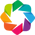

Winrate: 0.8935128518971848
Avg: 0.7578702955936354


:Bars   [index]   (trades_cumsum)

In [59]:
# primitive backtest on nr7
# TODO with entry and exit levels created we could backtest completely in pandas?

# https://www.youtube.com/watch?v=2xFr0tJU0pM
try:
  import panel as pn
  import hvplot.pandas
  import holoviews as hv
except:
  !pip install hvplot
  import hvplot.pandas
  import holoviews as hv

# pn.extension(comms="colab")
# pn.extension()
hv.extension("bokeh")

# FIXME how possible no losers?
# check for gap up
if True:
  #  and x["ft_ta_NR7"]
  trades = sec.apply(lambda x: x["close"] - x["chart_NR7_level_high"] if x["high"] > x["chart_NR7_level_high"] else 0, axis="columns")
  # sum([t for t in trades if t is not None])

  losses = (trades < 0).sum()
  wins = (trades >= 0).sum()
  print (f"Winrate: {wins / trades.count()}")
  print (f"Avg: {trades.mean()}")
  trades

  sec["trades"] = trades
  sec["trades_cumsum"] = trades.cumsum()

# sec[["high", "close", "chart_NR7_level_high", "ft_ta_NR7", "trades"]]
# [x for x in trades if x < 0]
# trades


# trades.cumsum().plot()
hpl = sec.hvplot.bar(y="trades_cumsum")
hpl

In [60]:
from backtest_lib_stop_entry import StopEntryStrategy

bt = get_bt_results(sec, StrategyClass=StopEntryStrategy)
bt._results

Start                     2010-01-04 00:00:00
End                       2022-12-23 00:00:00
Duration                   4736 days 00:00:00
Exposure Time [%]                   29.436965
Equity Final [$]                  19852.14044
Equity Peak [$]                  20450.777243
Return [%]                          98.521404
Buy & Hold Return [%]              237.871702
Return (Ann.) [%]                    5.430031
Volatility (Ann.) [%]                8.641782
Sharpe Ratio                         0.628346
Sortino Ratio                        0.983228
Calmar Ratio                         0.337341
Max. Drawdown [%]                  -16.096575
Avg. Drawdown [%]                   -1.601032
Max. Drawdown Duration      977 days 00:00:00
Avg. Drawdown Duration       42 days 00:00:00
# Trades                                  327
Win Rate [%]                        92.966361
Best Trade [%]                       5.758922
Worst Trade [%]                    -11.126253
Avg. Trade [%]                    

In [68]:
from backtest_lib_stop_entry import StopEntryStrategy

class NRStrategy(StopEntryStrategy):
  nr_period = 7
  exit_delay = 1

  def same_day_exit(self):
    if self.position:
      for trade in self.trades:
        trade.close()

  def timed_exit(self, on_profit=True):
    if self.position:
      for trade in self.trades:
        if len(self.data) - trade.entry_bar >= self.max_delay:
            trade.close()
        if len(self.data) - trade.entry_bar >= self.exit_delay:
          if not on_profit:
            trade.close()
          elif on_profit and trade.pl > 0:
            trade.close()

  def postprocess(self):
    # self.same_day_exit()
    self.timed_exit(on_profit=False)

  def init(self):
    self.is_signal_long = self.I(get_ft_nr_x_bool, self.data.Ft_cnd_range, self.nr_period, overlay=False)
    self.is_signal_short = self.I(get_ft_nr_x_bool, self.data.Ft_cnd_range, self.nr_period, overlay=False)
    self.buy_stop = self.I(get_ft_level, self.data.High, self.is_signal_long.s)
    self.sell_stop = self.I(get_ft_level, self.data.Low, self.is_signal_short.s)

  def next(self):
    if not self.position:
      if self.is_signal_long:
        self.buy(stop=self.data["High"])
      # elif
      if self.is_signal_short:
        self.sell(stop=self.data["Low"])
        
    self.postprocess()

bt = get_bt_results(sec, StrategyClass=NRStrategy)
bt._results

Start                     2010-01-04 00:00:00
End                       2022-12-23 00:00:00
Duration                   4736 days 00:00:00
Exposure Time [%]                    9.577723
Equity Final [$]                 12110.974947
Equity Peak [$]                  12297.629542
Return [%]                          21.109749
Buy & Hold Return [%]              237.871702
Return (Ann.) [%]                    1.487851
Volatility (Ann.) [%]                3.795689
Sharpe Ratio                         0.391984
Sortino Ratio                         0.75581
Calmar Ratio                         0.163635
Max. Drawdown [%]                   -9.092521
Avg. Drawdown [%]                   -2.508202
Max. Drawdown Duration     3725 days 00:00:00
Avg. Drawdown Duration      496 days 00:00:00
# Trades                                  313
Win Rate [%]                        44.408946
Best Trade [%]                        3.83405
Worst Trade [%]                     -2.816822
Avg. Trade [%]                    

In [37]:
opt = bt.optimize(
    nr_period=range(2,12)
)
opt._strategy

Backtest.optimize:   0%|          | 0/2 [00:00<?, ?it/s]

<Strategy NRStrategy(nr_period=5)>

In [ ]:
"""
# Get help
"""
# bt_df.columns
from backtesting import backtesting as bts
# help(bts.Position)
# bts.Trade